In [28]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

In [29]:
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()
# CNN에 적용 가능한 데이터 타입으로 변경해준다. channel 추가 
X_train_full = np.expand_dims(X_train_full, -1)
X_test = np.expand_dims(X_test,-1)

X_train,X_vaild = X_train_full[:-5000], X_train_full[-5000:]
y_train,y_vaild = y_train_full[:-5000], y_train_full[-5000:]

print("X_train shape :", X_train.shape)
print("y_train shape :", y_train.shape)

X_train shape : (55000, 28, 28, 1)
y_train shape : (55000,)


In [30]:
X_train[0].shape # input shape 마지막 1은 channel 의 크기 만약 RGB : 3

(28, 28, 1)

In [31]:
Y_train = keras.utils.to_categorical(y_train)
Y_test = keras.utils.to_categorical(y_test)
Y_vaild = keras.utils.to_categorical(y_vaild)

In [32]:
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [33]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu',input_shape=[28, 28, 1])) #units 의 갯수 64 ??
model.add(keras.layers.MaxPooling2D(pool_size=2))
model.add(keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=2)) # 특징 추출
model.add(keras.layers.Flatten()) # 추출된 특징을 조합
model.add(keras.layers.Dense(units=128, activation='relu'))
model.add(keras.layers.Dense(units=64, activation='relu'))
model.add(keras.layers.Dense(units=10, activation='softmax'))

In [34]:
model.compile(loss='categorical_crossentropy', optimizer='adam',  metrics=['accuracy'])

In [35]:
model.fit(X_train, Y_train, batch_size=128, epochs=4)

Epoch 1/4
430/430 [==============================] - 4s 7ms/step - loss: 0.6641 - accuracy: 0.9196
Epoch 2/4
430/430 [==============================] - 3s 7ms/step - loss: 0.0543 - accuracy: 0.9833
Epoch 3/4
430/430 [==============================] - 3s 7ms/step - loss: 0.0384 - accuracy: 0.9881
Epoch 4/4
430/430 [==============================] - 3s 7ms/step - loss: 0.0298 - accuracy: 0.9903


In [36]:
np.round(model.predict(X_test))[0]

313/313 [==============================] - 1s 2ms/step


array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [37]:
y_test[0]

7

In [38]:
score = model.evaluate(X_test, Y_test,
                       verbose=2)# verbose는 얼마나 정보를 자세하게 나타낼 것인가. 0,1,2 세가지로 나뉨
print('Test score:', score[0])
print('Test accuracy:', score[1])

313/313 - 1s - loss: 0.0754 - accuracy: 0.9787 - 876ms/epoch - 3ms/step
Test score: 0.07544692605733871
Test accuracy: 0.9786999821662903


In [39]:
model.predict(X_test).argmax(axis=1)#softmax 로 나온 결과를 원래 결과로 되돌려주기 위한 방법

313/313 [==============================] - 1s 2ms/step


array([7, 2, 1, ..., 4, 5, 6])

In [40]:
confusion_matrix?

In [41]:
# Plot confusion matrix 를 통해 맞는값들과 틀린값들을 비교해 보자. 
from sklearn.metrics import confusion_matrix
P_test = model.predict(X_test).argmax(axis=1)
confusion_matrix(y_test, P_test)

313/313 [==============================] - 1s 2ms/step


array([[ 973,    1,    1,    0,    1,    0,    2,    1,    1,    0],
       [   0, 1130,    0,    0,    3,    1,    1,    0,    0,    0],
       [   3,    1, 1001,    0,    7,    0,    1,   19,    0,    0],
       [   0,    0,    2,  992,    0,    7,    0,    8,    1,    0],
       [   0,    1,    0,    0,  981,    0,    0,    0,    0,    0],
       [   1,    0,    0,    4,    0,  883,    2,    1,    0,    1],
       [   1,    3,    0,    0,    7,    4,  943,    0,    0,    0],
       [   0,    2,    1,    0,    4,    1,    0, 1020,    0,    0],
       [   9,    0,    5,    2,    7,    7,    4,   10,  923,    7],
       [   3,    4,    0,    0,   42,    6,    0,   13,    0,  941]])

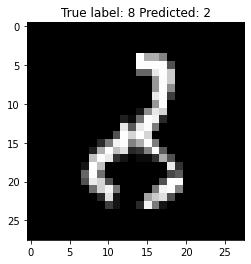

In [45]:
miss_class_id = np.where(P_test != y_test)[0]
i = np.random.choice(miss_class_id)
X_test = X_test.reshape(10000, 28,28)
plt.imshow(X_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], P_test[i]));

In [46]:
import cv2

In [58]:
test_3 = cv2.imread("./3.png", cv2.IMREAD_GRAYSCALE).reshape(1,28,28,1)
test_4 = cv2.imread("./4.png", cv2.IMREAD_GRAYSCALE).reshape(1,28,28,1)
test_7 = cv2.imread("./7.png", cv2.IMREAD_GRAYSCALE).reshape(1,28,28,1)

In [59]:
test_3.shape

(1, 28, 28, 1)

In [62]:
np.argmax(model.predict(test_7))

1/1 [==============================] - 0s 17ms/step


7

In [15]:
miss_class_id

array([ 217,  320,  447,  582,  619,  625,  726,  882,  965,  982, 1014,
       1039, 1112, 1114, 1156, 1226, 1232, 1247, 1290, 1299, 1319, 1328,
       1393, 1522, 1527, 1530, 1554, 1681, 1709, 1737, 1754, 1878, 1901,
       1982, 2018, 2130, 2135, 2182, 2293, 2380, 2387, 2414, 2597, 2896,
       2927, 2939, 2953, 3005, 3060, 3073, 3100, 3329, 3475, 3550, 3558,
       3662, 3871, 3906, 4007, 4027, 4053, 4063, 4065, 4078, 4163, 4224,
       4256, 4259, 4265, 4369, 4400, 4443, 4500, 4507, 4536, 4571, 4620,
       4740, 4761, 4807, 4823, 4838, 4860, 5201, 5265, 5457, 5654, 5937,
       5955, 5973, 5997, 6101, 6505, 6560, 6571, 6576, 6597, 6625, 6755,
       6783, 7492, 8128, 8325, 8375, 8397, 8527, 9009, 9015, 9587, 9596,
       9634, 9664, 9692, 9768, 9770, 9779, 9792, 9828, 9888])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3200)              0         
                                                                 
 dense (Dense)               (None, 128)               4

In [17]:
# https://subinium.github.io/Keras-5-1/

In [18]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [19]:
test_1=np.expand_dims(X_train_full, -1)/255

In [20]:
test_1.shape

(60000, 28, 28, 1)

In [21]:
np.argmax(model.predict(test_1),axis=1)

1875/1875 [==============================] - 4s 2ms/step


array([1, 1, 1, ..., 1, 1, 1])